In [3]:
import pandas as pd
import numpy as np
import scipy.stats as st
import math 
import matplotlib.pyplot as plt

In [4]:
# Part 2 
# Data Import
vis_df = pd.read_excel(r'FINAL_2020_wjp_rule_of_law_index_HISTORICAL_DATA_FILE.xlsx', header=None, sheet_name = "Cleanest Data")
df = pd.read_excel(r'FINAL_2020_wjp_rule_of_law_index_HISTORICAL_DATA_FILE.xlsx', sheet_name = "Cleanest Data")
df2 = pd.read_excel(r'FINAL_2020_wjp_rule_of_law_index_HISTORICAL_DATA_FILE.xlsx', sheet_name="Subgroups")
quant_list_corruption = df['Factor 2: Absence of Corruption']
corruption_arr = np.array(quant_list_corruption)
quant_list_openg = df['Factor 3: Open Government']
openg_arr = np.array(quant_list_openg)
corruption_if_gov_open = np.array(df2['Factor 2: Absence of Corruption 1'])
corruption_if_gov_not_open = np.array(df2['Factor 2: Absence of Corruption 0'])
corruption_if_gov_not_open = corruption_if_gov_not_open[~np.isnan(corruption_if_gov_not_open)]
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
print(vis_df)

                                  0                                1  \
0                           Country  Factor 2: Absence of Corruption   
1                       Afghanistan                         0.304097   
2                           Albania                         0.367105   
3                           Algeria                         0.454544   
4                            Angola                         0.425764   
5               Antigua and Barbuda                         0.606537   
6                         Argentina                         0.517063   
7                         Australia                         0.815936   
8                           Austria                         0.818857   
9                       The Bahamas                         0.629475   
10                       Bangladesh                         0.362141   
11                         Barbados                         0.696033   
12                          Belarus                          0.5

In [5]:
# Part 2 -- 1 a
# For at least one quantitative variable, find a point estimate of the underlying population mean 𝜇. Compute a confidence interval for 𝜇, at a confidence level of your choice.

# Point Estimate of 𝜇
print("Part 2 -- 1a")
def m_o_m_sample_mean_estimator(data):
    return (1/len(data) * sum(data))
print(f'Point Estimate of u: {m_o_m_sample_mean_estimator(quant_list_corruption)}')

# Point Estimate of theta
def m_o_m_sample_stdev_estimator(data):
    xbar = m_o_m_sample_mean_estimator(data)
    estimator = []
    for i in data:
        estimator.append(((i-xbar)**2))
    return math.sqrt(((1/len(data) * sum(estimator))))
print(f"Point Estimate of theta: {m_o_m_sample_stdev_estimator(quant_list_corruption)}")

# Confidence Interval
def t_c_i(data,confidence_level):
    bound_1 = m_o_m_sample_mean_estimator(data) + (st.t.ppf(df = len(data)-1, q = (1-confidence_level)/2)*(m_o_m_sample_stdev_estimator(data)/math.sqrt(len(data))))
    bound_2 = m_o_m_sample_mean_estimator(data) - (st.t.ppf(df = len(data)-1, q = (1-confidence_level)/2)*(m_o_m_sample_stdev_estimator(data)/math.sqrt(len(data))))
    print(f'Confidence Level: {confidence_level}. \nConfidence Interval: [{bound_1},{bound_2}].')
print(t_c_i(quant_list_corruption,.95))
print('\n')
# Part 2 -- 1 b
# Perform a one- or two-sided test, at the level of your choice, of the hypothesis that 𝜇𝜇 is equal to a specific value of your choice. State the associated p-value.
print("Part 2 -- 1b")
def two_sided_hypothesis_test_stdnorm(data,u,a):
    
    def m_o_m_sample_mean_estimator(data):
        return (1/len(data) * sum(data))
    
    xbar = m_o_m_sample_mean_estimator(data)
    
    def m_o_m_sample_stdev_estimator(data):
        xbar = m_o_m_sample_mean_estimator(data)
        estimator = []
        for i in data:
            estimator.append(((i-xbar)**2))
        return math.sqrt(((1/len(data) * sum(estimator))))
    
    stdev = m_o_m_sample_stdev_estimator(data) 
    n = len(data)
    test_statistic = (xbar-u)/(math.sqrt((stdev**2)/n))
    critical_val = st.norm.ppf(q=(a/2))
    bool_val = abs(test_statistic) > abs(critical_val)
    
    p_val = 0
    
    if test_statistic < 0:
        p_val = (2 * st.norm.cdf(test_statistic))
    elif test_statistic > 0:
        p_val = (2 * (1 - st.norm.cdf(test_statistic)))
    else:
        print('Houston, we have a problem')
    #print(f'P value: {p_val}')
    
    print(f'Xbar:{xbar}')
    print(f'Stdev:{stdev}')
    print(f'Null Hypothesis: u = {u} ')
    print(f'Alternate Hypothesis: u dne {u}')
    print(f'Test Statistics: {-test_statistic}, {test_statistic}')
    print(f'Critical Values: {critical_val}, {-critical_val}')
    print(f'P Value: {p_val}')
    if bool_val == True:
        print('Reject the null hypothesis')
    else:
        print('Fail to reject the null hypothesis')
two_sided_hypothesis_test_stdnorm(quant_list_corruption,.5,.1)

Part 2 -- 1a
Point Estimate of u: 0.5152646780706923
Point Estimate of theta: 0.18304796201217868
Confidence Level: 0.95. 
Confidence Interval: [0.4832487495141398,0.5472806066272449].
None


Part 2 -- 1b
Xbar:0.5152646780706923
Stdev:0.18304796201217868
Null Hypothesis: u = 0.5 
Alternate Hypothesis: u dne 0.5
Test Statistics: -0.9434692204394373, 0.9434692204394373
Critical Values: -1.6448536269514729, 1.6448536269514729
P Value: 0.34544095172543576
Fail to reject the null hypothesis


In [6]:
# Part 2 -- 2 a
# For at least one quantitative variable, find a point estimate of the underlying population standard deviation 𝜎𝜎. Compute a confidence interval for 𝜎𝜎, at a confidence level of your choice.
print('Part 2 -- 2 a')
def stdev_estimator(data):
        xbar = m_o_m_sample_mean_estimator(data)
        estimator = []
        for i in data:
            estimator.append(((i-xbar)**2))
        return math.sqrt(((1/(len(data)-1)) * sum(estimator)))
stdev_estimator_1 = stdev_estimator(corruption_arr)
print(f'Point Estimate of S: {stdev_estimator_1}')

def stdev_confidence_interval(data,cl):
    stdev_point_estimate = stdev_estimator(data)
    upper_bound = math.sqrt((1/st.chi2.ppf(df=(len(data)-1) , q = (1-cl)/2)) * ((len(data)-1) * (stdev_point_estimate**2)))
    lower_bound = math.sqrt((1/st.chi2.ppf(df=(len(data)-1) , q = (1-(1-cl)/2))) * ((len(data)-1) * (stdev_point_estimate**2)))
    print(f'{cl}% Confident Interval\n{lower_bound,upper_bound}')
print(f'{stdev_confidence_interval(corruption_arr,.95)}')
print('\n')
# Part 2 -- 2 b 
# Perform a one- or two-sided test, at the level of your choice, of the hypothesis that 𝜎𝜎 is equal to a specific value of your choice. State the associated p-value.
print('Part 2 -- 2 b')
def one_sided_var_est_hypothesis_test(data,theta,a):
        
    def m_o_m_sample_stdev_estimator(data):
        xbar = m_o_m_sample_mean_estimator(data)
        estimator = []
        for i in data:
            estimator.append(((i-xbar)**2))
        return math.sqrt(((1/len(data) * sum(estimator))))
    stdev = m_o_m_sample_stdev_estimator(data) 
    n = len(data)
    test_statistic = ((n - 1) * ((stdev**2)/(theta**2)))
    critical_val = st.chi2.ppf(df = n-1,q = (1-a))
    bool_val = abs(test_statistic) > abs(critical_val)
    
    p_val = 0
    
    if test_statistic > 0:
        p_val = (1 - (st.chi2.cdf(df = n-1, x =test_statistic)))
    else:
        print('Houston, we have a problem')
    
    print(f'P value: {p_val}')
    
    print(f'Stdev:{stdev}')
    print(f'Null Hypothesis: theta = {theta} ')
    print(f'Alternate Hypothesis: theta > {theta}')
    print(f'Test Statistic: {test_statistic}')
    print(f'Critical Value: {critical_val}')
    print(f'P Value: {p_val}')
    if bool_val == True:
        print('Reject the null hypothesis')
    else:
        print('Fail to reject the null hypothesis')
one_sided_var_est_hypothesis_test(corruption_arr,.15,.05)

Part 2 -- 2 a
Point Estimate of S: 0.18376721021320103
0.95% Confident Interval
(0.1636791875526216, 0.20952023247847654)
None


Part 2 -- 2 b
P value: 0.000291863655901059
Stdev:0.18304796201217868
Null Hypothesis: theta = 0.15 
Alternate Hypothesis: theta > 0.15
Test Statistic: 189.12589610645003
Critical Value: 154.30151616535022
P Value: 0.000291863655901059
Reject the null hypothesis


In [7]:
# Part 2 -- 3 a
# For at least one binary variable, find a point estimate of the underlying proportion 𝑝𝑝 in a particular category. Compute a confidence interval for 𝑝𝑝, at a confidence level of your choice
print('Part 2 -- 3 a')
def bernouli_confidence_interval(df,cl):
    
    def point_estimate_p_hat(df):
        bool_series = df["Open Government"] == 1
        p_hat = bool_series.sum() / len(bool_series)
        return p_hat
    
    n = len(df["Open Government"] == 1)
    p_hat = point_estimate_p_hat(df)
    
    z = abs(st.norm.ppf((1-cl)/2))
    interval_0 = p_hat - (z * (math.sqrt(((p_hat * (1-p_hat)) / n))))
    interval_1 = p_hat + (z * (math.sqrt(((p_hat * (1-p_hat)) / n))))
    
    print(f'Binary variable measures absence of corruption among open governments.')
    print(f'Point Estimate of P: {p_hat}')
    print(f'{cl}% Confidence Interval')
    print(f'[{interval_0}, {interval_1}]')
bernouli_confidence_interval(df,.95)
print('\n')
# Part 2 -- 3 b
# Perform a one- or two-sided test, at the level of your choice, of the hypothesis that 𝑝𝑝 is equal to a specific value of your choice. State the associated p-value.
print('Part 2 -- 3 b')
def bernouli_two_sided_hypothesis_test(df,p,a):
    
    print(f'Null Hypothesis: P = {p}')
    print(f'Alternate Hypothesis: P does not equal {p}')
    def point_estimate_p_hat(df):
        bool_series = df["Open Government"] == 1
        p_hat = bool_series.sum() / len(bool_series)
        return p_hat
    
    n = len(df["Open Government"] == 1)
    p_hat = point_estimate_p_hat(df)
    
    print(f'Point Estimate of P: {p_hat}')
    
    test_statistic = (p_hat - p) / (math.sqrt(((p * (1-p)) / (n))))
    
    print(f'Test Statistics: {-abs(test_statistic)}, {abs(test_statistic)}')
    
    critical_val = st.norm.ppf(q=(a/2))
    
    print(f'Critical Values: {-abs(critical_val)}, {abs(critical_val)}')
    
    bool_val = abs(test_statistic) > abs(critical_val)
    if bool_val == True:
        print('Reject the null hypothesis.')
    if bool_val == False:
        print('Fail to reject the null hypothesis')
    else:
        pass
    
    p_val = 0
    
    if test_statistic < 0:
        p_val = (2 * st.norm.cdf(test_statistic))
    elif test_statistic > 0:
        p_val = (2 * (1 - st.norm.cdf(test_statistic)))
    else:
        print('Houston, we have a problem')

    print(f'P value: {p_val}')

bernouli_two_sided_hypothesis_test(df,.5,.05)

Part 2 -- 3 a
Binary variable measures absence of corruption among open governments.
Point Estimate of P: 0.5078125
0.95% Confidence Interval
[0.421204085230644, 0.594420914769356]


Part 2 -- 3 b
Null Hypothesis: P = 0.5
Alternate Hypothesis: P does not equal 0.5
Point Estimate of P: 0.5078125
Test Statistics: -0.17677669529663687, 0.17677669529663687
Critical Values: -1.9599639845400545, 1.9599639845400545
Fail to reject the null hypothesis
P value: 0.8596837951986662


In [8]:
# Part 2 -- 4 a
# For at least one quantitative variable, find a point estimate of the difference 𝜇𝜇1−𝜇𝜇2 between the means of the underlying subpopulations. Compute a confidence interval for 𝜇𝜇1−𝜇𝜇2, at a confidence level of your choice.
print('Part 2 -- 4 a')
def confidence_interval(data1,data0,cl):
    
    xbar1 = data1.mean()
    xbar0 = data0.mean()
    s1 = data1.std()
    s0 = data0.std()
    n1 = len(data1)
    n0 = len(data0)
    
    print(f'Xbar1: {xbar1}')
    print(f'Xbar0: {xbar0}')
    print(f'S1: {s1}')
    print(f'S0: {s0}')
    print(f'n1: {n1}')
    print(f'n0: {n0}')
    
    z = abs(st.norm.ppf((1-cl)/2))
    
    interval_0 = (xbar1-xbar0) - (z * (math.sqrt(((s1**2)/n1) + ((s0**2)/n0))))
    interval_1 = (xbar1-xbar0) + (z * (math.sqrt(((s1**2)/n1) + ((s0**2)/n0))))
    print('')
    print(f'{cl}% Confidence Interval')
    print(f'[{interval_0}, {interval_1}]')
    
print(confidence_interval(corruption_if_gov_open,corruption_if_gov_not_open,.95))
print('\n')
# Part 2 -- 4 b
# Perform a one- or two-sided test, at the level of your choice, of the hypothesis that 𝜇𝜇1−𝜇𝜇2 equals a specific value of your choice. State the associated p-value.
print('Part 2 -- 4b')
def two_sided_diff_means_hypothesis_test(data1,data0,u1,u0,a):
    
    print('Null Hypothesis: u1 - u0 = 0')
    print('Alternate Hypothesis: u1 - u0 does not equal 0')
    
    xbar1 = data1.mean()
    xbar0 = data0.mean()
    s1 = data1.std()
    s0 = data0.std()
    n1 = len(data1)
    n0 = len(data0)
    
    print(f'Xbar1: {xbar1}')
    print(f'Xbar0: {xbar0}')
    print(f'S1: {s1}')
    print(f'S0: {s0}')
    print(f'n1: {n1}')
    print(f'n0: {n0}')
    
    test_statistic = (((xbar1 - xbar0) - (u1 - u0)) / ((((s1) / math.sqrt(n1)) + ((s0) / math.sqrt(n0)))))
    critical_val = st.norm.ppf(q=(a/2))
    
    print(f'Critical Values: {-abs(critical_val)}, {abs(critical_val)}')
    print(f'Test Statistic: {test_statistic}')
    
    bool_val = abs(test_statistic) > abs(critical_val)
    
    if bool_val == True:
        print('Reject the null hypothesis.')
    if bool_val == False:
        print('Fail to reject the null hypothesis')
    else:
        pass
    
    p_val = 0
    
    if test_statistic < 0:
        p_val = (2 * st.norm.cdf(test_statistic))
    elif test_statistic > 0:
        p_val = (2 * (1 - st.norm.cdf(test_statistic)))
    else:
        print('Houston, we have a problem')
    
    print(f'P value: {p_val}')
    
two_sided_diff_means_hypothesis_test(data1 = corruption_if_gov_open,data0=corruption_if_gov_not_open,u1=0,u0=0,a=.1)

Part 2 -- 4 a
Xbar1: 0.6120782247067618
Xbar0: 0.41537768550966775
S1: 0.18514485572730968
S0: 0.11428980714074742
n1: 65
n0: 63

0.95% Confidence Interval
[0.14357505752329, 0.24982602087089803]
None


Part 2 -- 4b
Null Hypothesis: u1 - u0 = 0
Alternate Hypothesis: u1 - u0 does not equal 0
Xbar1: 0.6120782247067618
Xbar0: 0.41537768550966775
S1: 0.18514485572730968
S0: 0.11428980714074742
n1: 65
n0: 63
Critical Values: -1.6448536269514729, 1.6448536269514729
Test Statistic: 5.264502740929246
Reject the null hypothesis.
P value: 1.4056930264239043e-07


In [9]:
# Part 2 -- 5 a
# For at least one quantitative variable, find a point estimate of the ratio 𝜎𝜎12𝜎𝜎22 of the variances of the underlying subpopulation distributions. Compute a confidence interval for 𝜎𝜎12𝜎𝜎22, at a confidence level of your choice.

# S1 == stdev for corruption_if_gov_open
# S0 == stdev for corruption_if_gov_not_open

s1 = stdev_estimator(corruption_if_gov_open)
s0 = stdev_estimator(corruption_if_gov_not_open)
n1 = len(corruption_if_gov_open)
n0 = len(corruption_if_gov_not_open)

s1_s0_point_est = (stdev_estimator(corruption_if_gov_open) / (stdev_estimator(corruption_if_gov_not_open)))

print('Part 2 -- 5 a')

print(f'Point Estimate of Ratio: {s1_s0_point_est}')

def var_confidence_interval(data1,data0,cl):
    s1 = stdev_estimator(data1)
    s0 = stdev_estimator(data0)
    s1_s0_ratio = s1/s0
    n1 = len(data1)
    n0 = len(data0)
    lower_f_val = st.f.ppf(dfn=(len(data1)-1),dfd=(len(data0)-1),q=((1-cl)/2))
    upper_f_val = st.f.ppf(dfn=(len(data1)-1),dfd=(len(data0)-1),q=(1- ((1-cl)/2)))
    lower_bound = (s1_s0_ratio/upper_f_val)
    upper_bound = (s1_s0_ratio/lower_f_val)

    print(f'{cl}% Confidence Interval\n[{lower_bound},{upper_bound}]')
var_confidence_interval(corruption_if_gov_open,corruption_if_gov_not_open,.95)

Part 2 -- 5 a
Point Estimate of Ratio: 1.6195576473466036
0.95% Confidence Interval
[0.9828786424311516,2.6633433561503708]


xbar: 0.5236124356167668
sx2: 0.02261291701837006
sx: 0.15037591901089103
Sxx: 2.871840461332997

ybar: 0.515264678070692
sy2: 0.03377038754954283
sy: 0.18376721021320105
Syy: 4.288839218791939

Sxy: 2.6923491049365267
sxy: 0.021199599251468713
r: 0.7671518460502788
r2: 0.5885219548983506
b1: 0.9374995377308816
b0: 0.024378261729832096



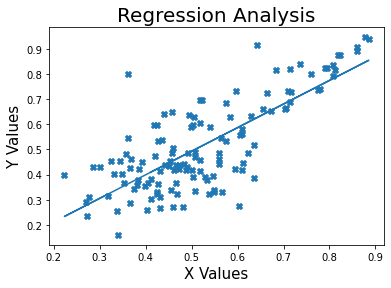


Average Error Term: 7.979727989493313e-17
See: 1.764763177503792
s2e: 0.014006056964315809
se: 0.11834718824000767


In [10]:
# Part 2 -- 7a
# Regress one variable 𝑌 on another variable 𝑋. Report point estimates 𝛽0 and 𝛽1 of the intercept and slope coefficients and the coefficient of determination 𝜌2.

def regression_analysis(x_data,y_data):
    
    # X Data 
    
    xbar = x_data.mean()
    print(f'xbar: {xbar}')
    sx2 = np.var(x_data,ddof=1)
    print(f'sx2: {sx2}')
    sx = np.std(x_data,ddof=1)
    print(f'sx: {sx}')
    Sxx = 0
    for i in x_data:
        Sxx += ((i - xbar)**2)
    print(f'Sxx: {Sxx}')
    
    print('')
    
    # Y Data
    
    ybar = y_data.mean()
    print(f'ybar: {ybar}')
    sy2 = np.var(y_data,ddof=1)
    print(f'sy2: {sy2}')
    sy = np.std(y_data,ddof=1)
    print(f'sy: {sy}')
    Syy = 0
    for i in y_data:
        Syy += ((i - ybar)**2)
    print(f'Syy: {Syy}')
    print('')
    
    # X Y Data
    
    
    xy = np.array([x_data,y_data])
    sxy = np.cov(xy)[0][1]
    
    def Sxy(x_data,y_data):
        
        def merge(x_data, y_data):
            new_arr = tuple(zip(x_data, y_data)) 
            return new_arr
        
        Sxy = 0
        
        for a,b in merge(x_data,y_data):
            Sxy += ((a - xbar) * (b- ybar))
        return Sxy
    Sxy = Sxy(x_data,y_data)
    print(f'Sxy: {Sxy}')
    
    def sxy(x_data,y_data):
        
        def merge(x_data, y_data):
            new_arr = tuple(zip(x_data, y_data)) 
            return new_arr
        
        Sxy = 0
        
        for a,b in merge(x_data,y_data):
            Sxy += ((a - xbar) * (b- ybar))
        return ((1/(len(merge(x_data,y_data))-1)) * Sxy)
    sxy = sxy(x_data,y_data)
    print(f'sxy: {sxy}')
    
    def r(x_data,y_data):
        sx = np.std(x_data,ddof=1)
        sy = np.std(y_data,ddof=1)
        r = ((sxy) / (sx * sy))
        return r
    r = r(x_data,y_data)
    print(f'r: {r}')
    print(f'r2: {r**2}')
    
    def b1(r,sy,sx):
        return r * (sy / sx)
    b1 = b1(r,sy,sx)
    print(f'b1: {b1}')
    
    def b0(ybar,b1,xbar):
        return ybar - (b1 * xbar)
    b0 = b0(ybar,b1,xbar)
    print(f'b0: {b0}')
    
    print('')
    
    def regression(x_data):
        y_values = []
        for i in x_data:
            y_values.append((b0 + (b1 * i)))
        y_val_arr = np.array(y_values)
        
        plt.figure(num = 2)
        plt.plot(x_data,y_val_arr)
        
        def merge(x_data, y_val_arr):
            new_arr = tuple(zip(x_data, y_val_arr)) 
            return new_arr
        
        return merge(x_data,y_val_arr)
    #print(f'Regression Y Values: {regression(x_data)}')
    
    regression(x_data)
    
    plt.figure(num = 2,figsize=(12,6))
    plt.scatter(x_data,y_data, marker = 'X', alpha = 1)
    plt.xlabel('X Values',fontsize=15)
    plt.ylabel('Y Values',fontsize=15)
    plt.title('Regression Analysis',fontsize=20)
    plt.show()
    
    print('')
    
    def error_terms(x_data,y_data):
        def regression_y_values(x_data):
            y_values = []
            for i in x_data:
                y_values.append((b0 + (b1 * i)))
            y_val_arr = np.array(y_values)
            return y_val_arr
        error_terms = y_data - regression_y_values(x_data)
        return error_terms
    #print(f'Error terms: {error_terms(x_data,y_data)}')
    
    def avg_error_term(x_data,y_data):
        avg_error_term = error_terms(x_data,y_data).mean()
        return avg_error_term
    print(f'Average Error Term: {avg_error_term(x_data,y_data)}')
    
    def See(error_terms):
        See = (error_terms**2).sum()
        return See
    print(f'See: {See(error_terms(x_data,y_data))}')
    
    def s2e(error_terms):
        See = (error_terms**2).sum()
        return (1/ (len(error_terms) - 2) * See)
    print(f's2e: {s2e(error_terms(x_data,y_data))}')
    print(f'se: {math.sqrt(s2e(error_terms(x_data,y_data)))}')

regression_analysis(openg_arr,corruption_arr)
